In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tqdm

from ts.model import GmmHmmLikelihoodSimilarity
from ts.plot import Plot
from ts.data.dataset import AmazonStockPrice

%matplotlib inline

In [2]:
stock_df = AmazonStockPrice.loadData('/Users/ahmed/Downloads/Datasets/amazonStockPrice')
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...,...
5837,2020-07-27,3062.000000,3098.000000,3015.770020,3055.209961,3055.209961,4170500
5838,2020-07-28,3054.270020,3077.090088,2995.760010,3000.330078,3000.330078,3126700
5839,2020-07-29,3030.989990,3039.159912,2996.770020,3033.530029,3033.530029,2974100
5840,2020-07-30,3014.000000,3092.000000,3005.000000,3051.879883,3051.879883,6128300


In [3]:
column_names = list(stock_df.columns)

for column_name in column_names:
    print(column_name, stock_df[column_name].dtype)

Date datetime64[ns]
Open float64
High float64
Low float64
Close float64
Adj Close float64
Volume int64


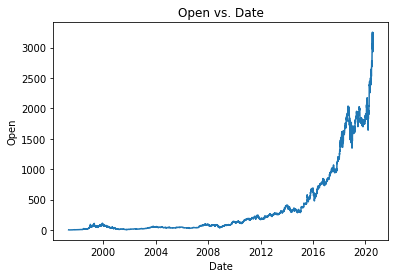

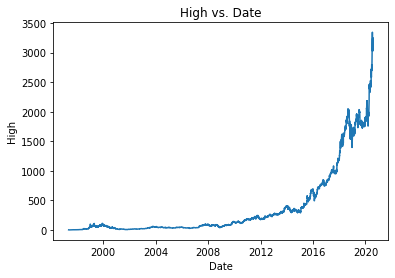

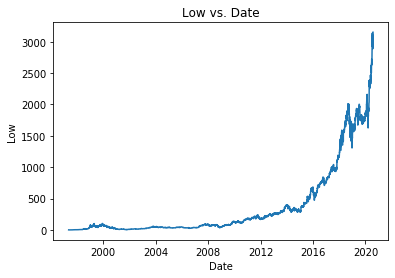

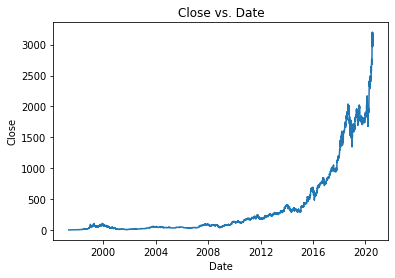

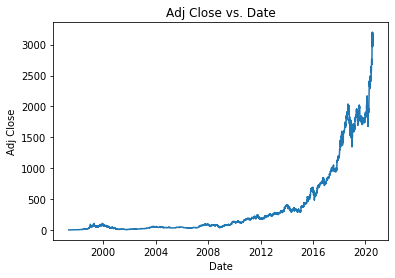

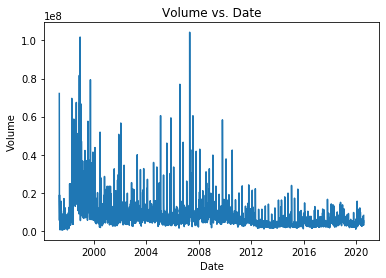

In [4]:
# Plotting the columns with respect to time

for column_name in column_names:
    if column_name == 'Date':
        continue
        
    plt.plot(stock_df['Date'].to_numpy(), stock_df[column_name].to_numpy())
    plt.xlabel('Date')
    plt.ylabel(column_name)
    plt.title(f'{column_name} vs. Date')
    plt.show()

In [5]:
# Drop the following columns

stock_df = stock_df.drop(columns=['Date', 'Volume', 'Adj Close'])

In [6]:
model = GmmHmmLikelihoodSimilarity(
    numStates=6,
    numMixtureComp=4,
    dimension=len(stock_df.columns),
    numIterations=100,
    threshold=0.0,
    covariance_type='full'
)

In [7]:
X = stock_df.to_numpy()

X.shape

(5842, 4)

In [8]:
trainSize = 4842

dataTrain = X[:trainSize]
dataTest = X[trainSize:]

True

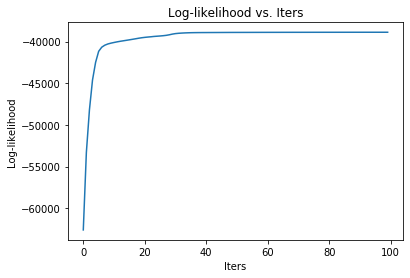

In [9]:
logLikelihoodValues = model.train([dataTrain])

plt.plot(logLikelihoodValues, label='log-likelihood')
plt.xlabel('Iters')
plt.ylabel('Log-likelihood')
plt.title('Log-likelihood vs. Iters')
model.model.monitor_.converged

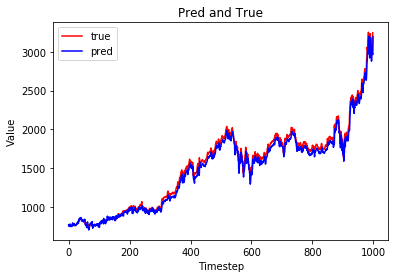

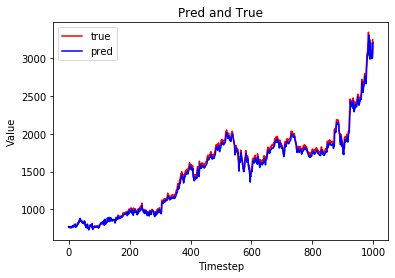

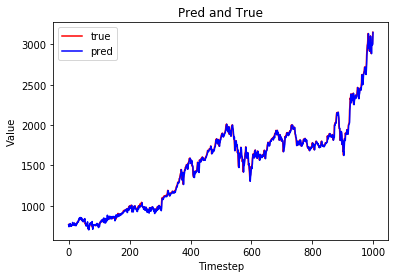

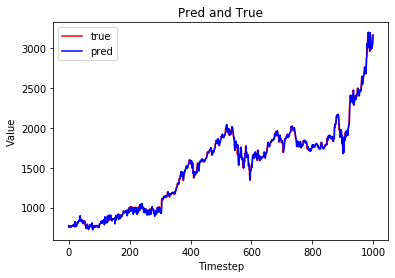

In [10]:
pred = model.predict(dataTest)
target = dataTest[1:]

for i, columnName in enumerate(list(stock_df.columns)):
    Plot.plotPredTrue(pred[:, i], target[:, i])